# importing libraries

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data

In [20]:
try:
    url = '/content/drive/MyDrive/Datasets/heart-disease/heart_2020_cleaned.csv'
    df = pd.read_csv(url)
    print(f'Data shapeis: {df.shape}')
except Exception as e:
    print('Error message is:', e)

Data shapeis: (319795, 18)


# Information from Data

In [21]:
print('head of data:\n{0}\ndtypes:\n{1}\ninfo:{2}\nsumof nulls:\n{3}'
            .format(df.head(), df.dtypes, df.info(), df.isnull().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [22]:
# Create DataFrame and drop rows with at least one value
# used dropna to delete rows that contains nulls
HeartDiseaseDataf = pd.DataFrame(df).dropna()
# check again the size of data:
print('new DataFrame shape is: {}'.format(HeartDiseaseDataf.shape))

for column in HeartDiseaseDataf:
  # get the unique values for every column
  uniq_val = np.unique(HeartDiseaseDataf[column])
  # count the unique values for every column
  np_val = len(uniq_val)
  if np_val < 15:
    print('The number of values for feature {} : {} -- :{}'.format(column, np_val, uniq_val))
  else:
    print('The number of values for feature {} : {}'.format(column, np_val))

new DataFrame shape is: (319795, 18)
The number of values for feature HeartDisease : 2 -- :['No' 'Yes']
The number of values for feature BMI : 3604
The number of values for feature Smoking : 2 -- :['No' 'Yes']
The number of values for feature AlcoholDrinking : 2 -- :['No' 'Yes']
The number of values for feature Stroke : 2 -- :['No' 'Yes']
The number of values for feature PhysicalHealth : 31
The number of values for feature MentalHealth : 31
The number of values for feature DiffWalking : 2 -- :['No' 'Yes']
The number of values for feature Sex : 2 -- :['Female' 'Male']
The number of values for feature AgeCategory : 13 -- :['18-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59' '60-64'
 '65-69' '70-74' '75-79' '80 or older']
The number of values for feature Race : 6 -- :['American Indian/Alaskan Native' 'Asian' 'Black' 'Hispanic' 'Other'
 'White']
The number of values for feature Diabetic : 4 -- :['No' 'No, borderline diabetes' 'Yes' 'Yes (during pregnancy)']
The number of values

In [23]:
# NADP is: NumberOfAlcoholHeartDiseasePersons
# NADP_not is: NumberOfNotAlcoholHeartDiseasePersons
def AlcoholDrinking():

  NADP = 0
  NADP_not = 0
  for Disease, Alcohol in zip(HeartDiseaseDataf['HeartDisease'], HeartDiseaseDataf['AlcoholDrinking']):
      #     print(Disease, Alcohol)/
      if Disease == Alcohol == 'Yes':
          NADP += 1
      elif Disease == Alcohol == 'No':
          NADP_not += 1
  NADPPeracentage = round(NADP/df.shape[0], 6)*100
  print("Alcohol Drinkers percentage that have Heart Disease to the data: {} %".format(NADPPeracentage))

  print('Number of Alcohol Drinkers that has Heart Disease', NADP)

  print("Number of Alcohol Drinkers that hasn't Heart Disease", NADP_not)
AlcoholDrinking()

Alcohol Drinkers percentage that have Heart Disease to the data: 0.3568 %
Number of Alcohol Drinkers that has Heart Disease 1141
Number of Alcohol Drinkers that hasn't Heart Disease 271786


In [24]:
# smoking is: NumberOfsmokingHeartDiseasePersons
# not_smoking is: NumberOfnotsmokingHeartDiseasePersons
smoking = 0
not_smoking = 0
for Disease, smoke in zip(HeartDiseaseDataf['HeartDisease'], HeartDiseaseDataf['Smoking']):
    if Disease == smoke == 'Yes':
        smoking += 1
    elif Disease == smoke == 'No':
        not_smoking += 1

print('Number of smoking Drinkers that has Heart Disease', smoking)
print('Number of Alcohol Drinkers that has Heart Disease', not_smoking)

Number of smoking Drinkers that has Heart Disease 16037
Number of Alcohol Drinkers that has Heart Disease 176551


In [25]:
male = 0
female = 0
for gender in HeartDiseaseDataf['Sex']:
    if gender == 'Male':
        male += 1
    elif gender == 'Female':
        female += 1

print('Number of male in the DataSet', male)
print('Number of female in the DataSet', female)


def gender():
    male = 0
    female = 0
    for Disease, gender in zip(HeartDiseaseDataf['HeartDisease'], HeartDiseaseDataf['Sex']):
        if Disease == 'Yes' and gender == 'Male':
            male += 1
        elif Disease == 'No' and gender == 'Female':
            female += 1

    print('Number of male that has Heart Disease', male)
    print('__________________________________')

    print('Number of female that has Heart Disease', female)
    print('__________________________________')

gender()

Number of male in the DataSet 151990
Number of female in the DataSet 167805
Number of male that has Heart Disease 16139
__________________________________
Number of female that has Heart Disease 156571
__________________________________


In [26]:
ageGroupsCount = {}

for Disease, age in zip(HeartDiseaseDataf['HeartDisease'], HeartDiseaseDataf['AgeCategory']):
    if Disease == 'Yes':
        ageGroupsCount[age] = ageGroupsCount.get(age, 0) + 1

print('count of heart desease for every AgeCategory:', sorted(ageGroupsCount.items()))



count of heart desease for every AgeCategory: [('18-24', 130), ('25-29', 133), ('30-34', 226), ('35-39', 296), ('40-44', 486), ('45-49', 744), ('50-54', 1383), ('55-59', 2202), ('60-64', 3327), ('65-69', 4101), ('70-74', 4847), ('75-79', 4049), ('80 or older', 5449)]


In [27]:
list = [i for i in HeartDiseaseDataf['PhysicalHealth'] if i % 2 == 0]
print(list)
print(len(list))

list = [i for i in HeartDiseaseDataf['PhysicalHealth'] if i % 2 != 0]
print(list)
print (len(list))

list = [i for i in HeartDiseaseDataf['SleepTime'] if i >= 10]
print(list)
print (len(list))

[0.0, 20.0, 0.0, 28.0, 6.0, 0.0, 0.0, 30.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 30.0, 0.0, 4.0, 30.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 6.0, 30.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 14.0, 0.0, 30.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 0.0, 30.0, 0.0, 30.0, 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 8.0, 30.0, 0.0, 0.0, 0.0, 30.0, 6.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 30.0, 0.0, 30.0, 0.0, 0.0, 0.0, 2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 0.0, 0.0, 20.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 14.0, 0.0, 0.0, 0.0, 0.0, 30.0, 0.0, 0.0, 30.0, 0.0, 2.0, 2.0, 6.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 10.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 10.0, 14.0, 20.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 2.0, 20.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [28]:
List_y = []
List_n = []
for character in HeartDiseaseDataf['Smoking']:
    if character == 'Yes':
        List_y.append(character)
    elif character == 'No':
        List_n.append(character)

# Display list
print(len(List_y))
print(List_y)
print("-----------------")
print(len(List_n))
print(List_n)

131908
['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'

In [29]:
class HeartDisease:
  def __init__(self):#initial value for all number of Kidney Disease people and skin cancer people as (count =0)
    self.Kidney_Disease = 0
    self.not_Kidney_Disease = 0
    self.skin_cancer = 0
    self.not_skin_cancer = 0

  def KidneyDisease(self):#function to calc number of people have heard disease and kidney disease or  Unsatisfactory people
        for HeartDisease, KidneyDisease in zip(HeartDiseaseDataf['HeartDisease'], HeartDiseaseDataf['KidneyDisease']):
            if HeartDisease == KidneyDisease == 'Yes':#if person have heart disease and kidney disease increment the count of Kidney_Disease
                self.Kidney_Disease += 1
            elif HeartDisease == KidneyDisease == 'No':#if Unsatisfactory people increment the count of not_Kidney_Disease
                self.not_Kidney_Disease += 1
        print('Number of people have HeartDisease and KidneyDisease : ', self.Kidney_Disease)
        print('Number of people have not HeartDisease and KidneyDisease : ', self.not_Kidney_Disease)

  def SkinCancer(self):#function to calc number of people have heard disease and Skin cancer or  Unsatisfactory people
        for HeartDisease, SkinCancer in zip(HeartDiseaseDataf['HeartDisease'], HeartDiseaseDataf['SkinCancer']):
            if HeartDisease == SkinCancer == 'Yes':#if person have heart disease and SkinCancer increment the count of skin_cancer
                self.skin_cancer += 1
            elif HeartDisease == SkinCancer == 'No':#if Unsatisfactory people increment the count of not_skin_cancer
                self.not_skin_cancer += 1

        print('Number of people have HeartDisease and Skin Cancer : ', self.skin_cancer)
        print('Number of people have not  HeartDisease and Skin Cancer : ', self.not_skin_cancer)

heart=HeartDisease()

In [30]:
heart.KidneyDisease()

Number of people have HeartDisease and KidneyDisease :  3455
Number of people have not HeartDisease and KidneyDisease :  284098


In [31]:
heart.SkinCancer()

Number of people have HeartDisease and Skin Cancer :  4980
Number of people have not  HeartDisease and Skin Cancer :  267583


In [32]:
#list to count number of people have Asthma
L1 = []
L2 = []
for i in HeartDiseaseDataf['Asthma']:
        if i == 'Yes':
            L1.append(i)
        elif i == 'No':
            L2.append(i)
print("Number of people have Asthma = ",len(L1))
print("Number of people not have Asthma =", len(L2))

Number of people have Asthma =  42872
Number of people not have Asthma = 276923


# Visualization

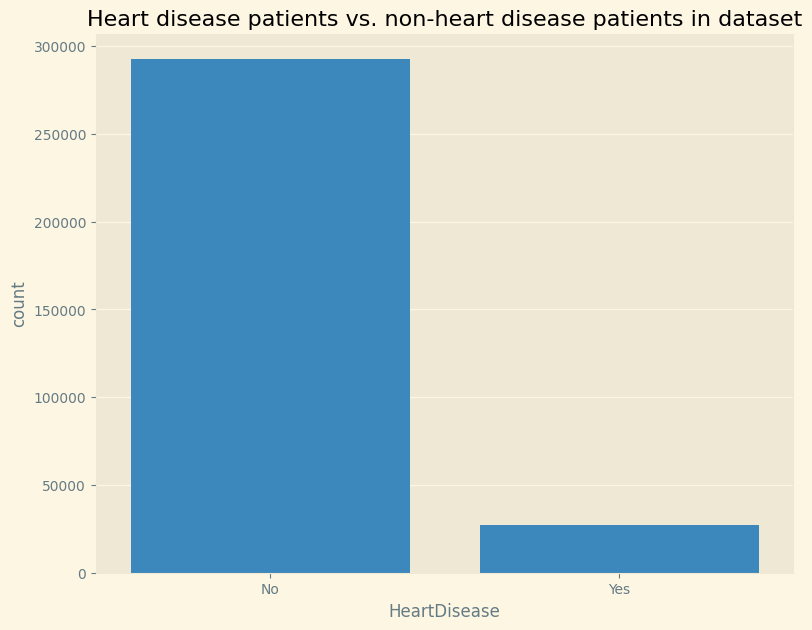

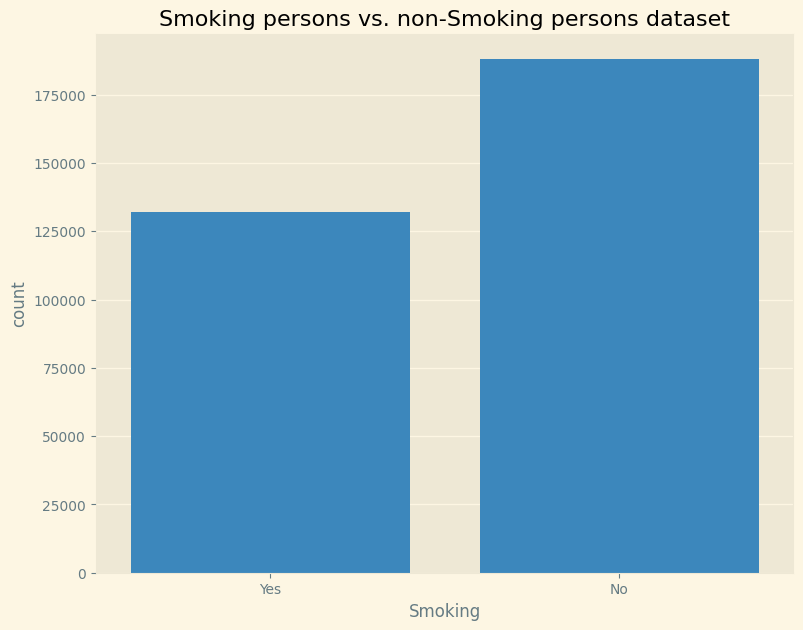

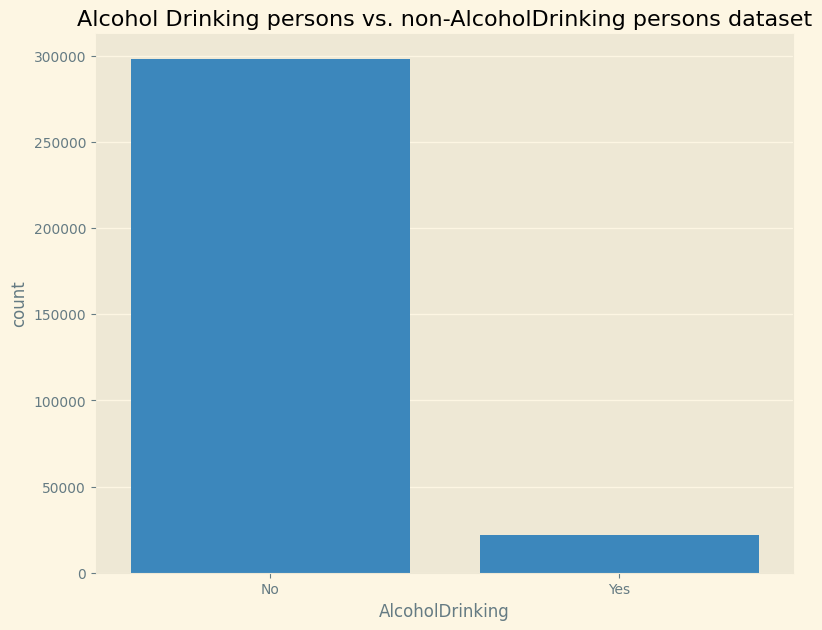

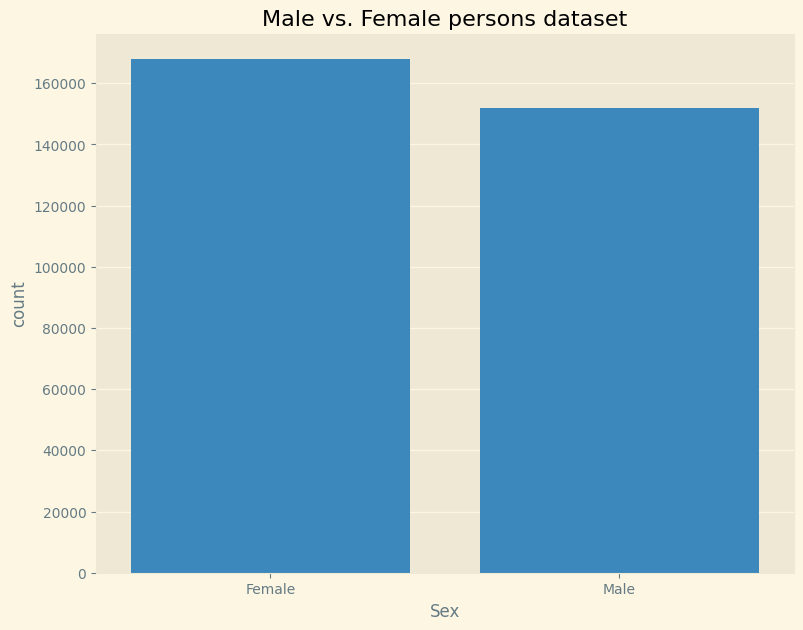

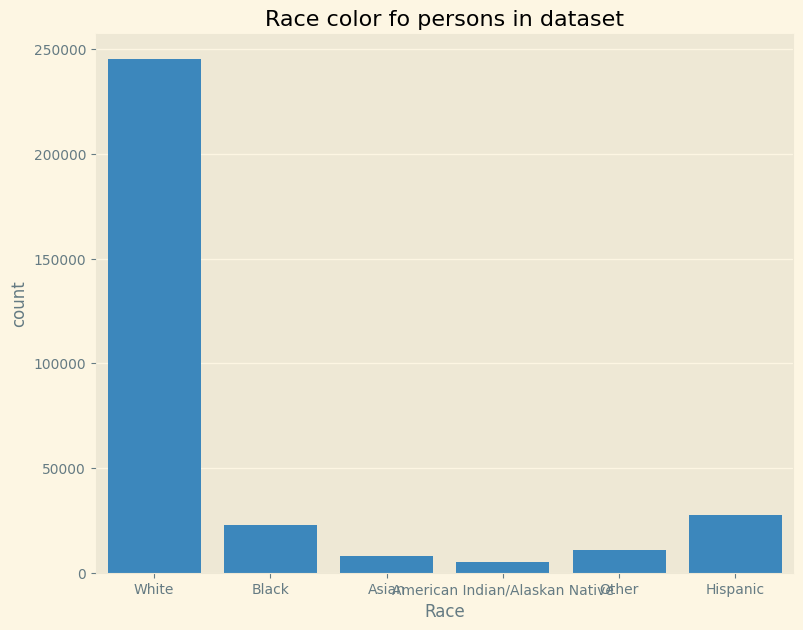

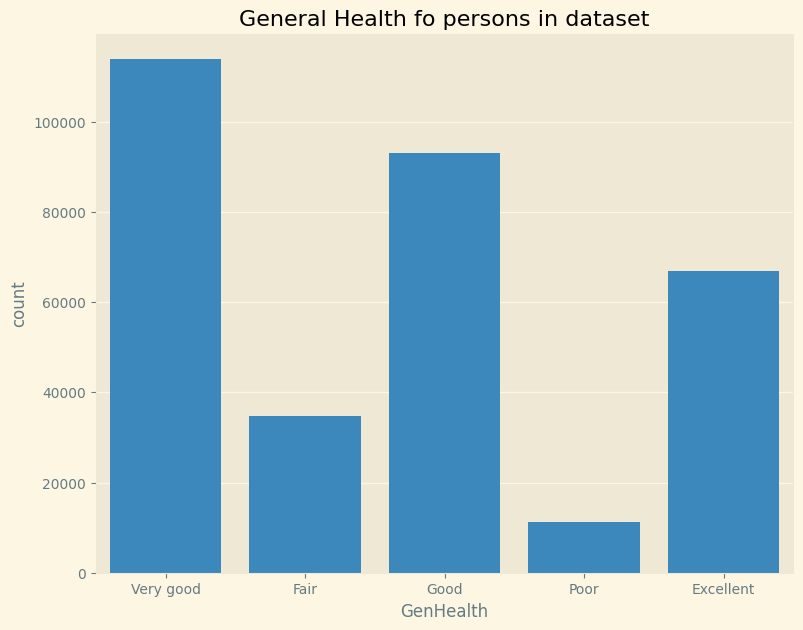

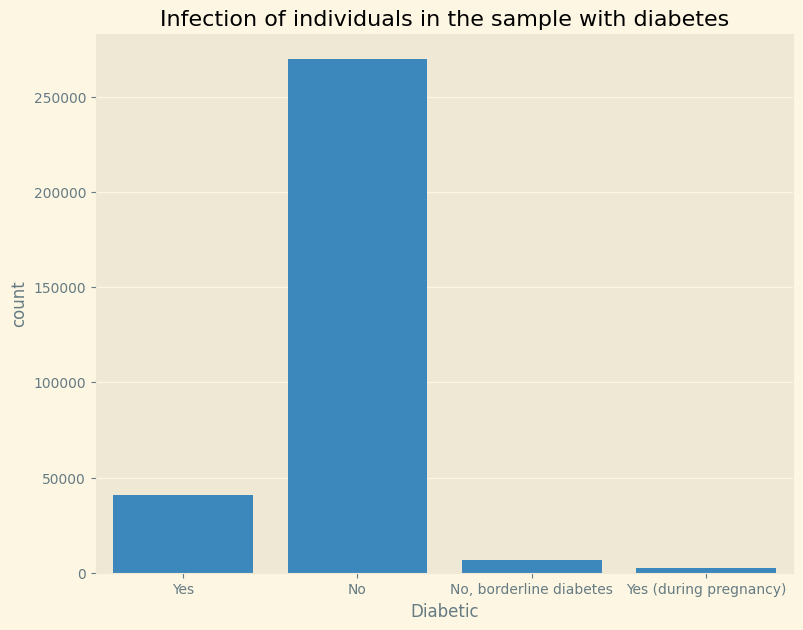

In [34]:
# plots

def drawPlots():
    plt.style.use('Solarize_Light2')
    plt.figure(figsize=(9, 7))
    plt.title('Heart disease patients vs. non-heart disease patients in dataset')
    sns.countplot(x='HeartDisease', data=HeartDiseaseDataf)
    plt.show()

    plt.figure(figsize=(9, 7))
    plt.title('Smoking persons vs. non-Smoking persons dataset')
    sns.countplot(x='Smoking', data=HeartDiseaseDataf)
    plt.show()

    plt.figure(figsize=(9, 7))
    plt.title('Alcohol Drinking persons vs. non-AlcoholDrinking persons dataset')
    sns.countplot(x='AlcoholDrinking', data=HeartDiseaseDataf)
    plt.show()

    plt.figure(figsize=(9, 7))
    plt.title('Male vs. Female persons dataset')
    sns.countplot(x='Sex', data=HeartDiseaseDataf)
    plt.show()

    plt.figure(figsize=(9, 7))
    plt.title('Race color fo persons in dataset')
    sns.countplot(x='Race', data=HeartDiseaseDataf)
    plt.show()

    plt.figure(figsize=(9, 7))
    plt.title('General Health fo persons in dataset')
    sns.countplot(x='GenHealth', data=HeartDiseaseDataf)
    plt.show()

    # مرضى السكر
    plt.figure(figsize=(9, 7))
    plt.title('Infection of individuals in the sample with diabetes')
    sns.countplot(x='Diabetic', data=HeartDiseaseDataf)
    plt.show()
drawPlots()